**AN√ÅLISE EXPLORAT√ìRIA DA AUTONOMIA EL√âTRICA DE VE√çCULOS COM COMBUST√çVEL ALTERNATIVO NOS EUA.**

**Este projeto tem como objetivo realizar uma an√°lise explorat√≥ria detalhada sobre os ve√≠culos movidos a combust√≠veis alternativos registrados nos Estados Unidos, com foco na vari√°vel `All-Electric Range` que representa a autonomia el√©trica dos modelos analisados.**

**A partir de um conjunto de dados oficiais, investigamos como diferentes caracter√≠sticas t√©cnicas e categ√≥ricas dos ve√≠culos, como tipo de combust√≠vel, motoriza√ß√£o, transmiss√£o, n√∫mero de cilindros e categoria (SUV, Sedan, Pickup etc.), influenciam diretamente na autonomia el√©trica.**

**Apesar do n√∫mero reduzido de registros com dados completos para modelagem preditiva, a an√°lise descritiva se mostrou valiosa ao revelar padr√µes e discrep√¢ncias importantes entre ve√≠culos 100% el√©tricos e h√≠bridos plug-in.**

**O estudo tem aplica√ß√£o pr√°tica para consumidores, fabricantes, formuladores de pol√≠ticas p√∫blicas e entusiastas da mobilidade el√©trica, fornecendo insights relevantes sobre a efici√™ncia energ√©tica e evolu√ß√£o tecnol√≥gica do setor automotivo alternativo.**

**Ao longo do notebook, apresentamos gr√°ficos explicativos e interpreta√ß√µes anal√≠ticas para cada m√©trica estudada, visando construir uma base s√≥lida de compreens√£o do cen√°rio atual dos ve√≠culos el√©tricos e h√≠bridos nos EUA.**

In [14]:
# Importando Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from sklearn.impute import SimpleImputer
import warnings
plt.rcParams['figure.figsize'] = (10, 5)
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')



In [15]:
# Carregando a base de dados
df = pd.read_csv('/content/Alternative Fuel Vehicles US.csv')

In [16]:
# Observando
df.head()

Category               Model  Model Year Manufacturer             Fuel  \
0  Sedan/Wagon                 NSX      2022.0        Acura  Hybrid Electric   
1  Sedan/Wagon                 A3       2022.0         Audi  Hybrid Electric   
2  Sedan/Wagon          A3 quattro      2022.0         Audi  Hybrid Electric   
3  Sedan/Wagon  A4 allroad quattro      2022.0         Audi  Hybrid Electric   
4  Sedan/Wagon          A4 quattro      2022.0         Audi  Hybrid Electric   

   All-Electric Range  PHEV Total Range  Alternative Fuel Economy City  \
0                 NaN               NaN                            NaN   
1                 NaN               NaN                            NaN   
2                 NaN               NaN                            NaN   
3                 NaN               NaN                            NaN   
4                 NaN               NaN                            NaN   

   Alternative Fuel Economy Highway  Alternative Fuel Economy Combined  ...  \
0                               NaN                                NaN  ...   
1                               NaN                                NaN  ...   
2                               NaN                                NaN  ...   
3                               NaN                                NaN  ...   
4                               NaN                                NaN  ...   

   Conventional Fuel Economy Combined  Transmission Type  Transmission Make  \
0                                21.0               Auto                NaN   
1                                32.0               Auto                NaN   
2                                31.0               Auto                NaN   
3                                26.0               Auto                NaN   
4                                29.0               Auto                NaN   

  Engine Type Engine Size Engine Cylinder Count Number of Passengers  \
0          SI        3.5L                   6.0                  NaN   
1          SI        2.0L                   4.0                  NaN   
2          SI        2.0L                   4.0                  NaN   
3          SI        2.0L                   4.0                  NaN   
4          SI        2.0L                   4.0                  NaN   

   Heavy-Duty Power System Notes Drivetrain  
0                      NaN   NaN        AWD  
1                      NaN   NaN        FWD  
2                      NaN   NaN        AWD  
3                      NaN   NaN        AWD  
4                      NaN   NaN        AWD  

[5 rows x 22 columns]

In [17]:
# Observando a quantidade de linhas e colunas
df.shape

(882, 22)

In [18]:
# Obtendo infirma√ß√µes sobre os tipos vari√°veis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 22 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Category                            882 non-null    object 
 1   Model                               882 non-null    object 
 2   Model Year                          594 non-null    float64
 3   Manufacturer                        882 non-null    object 
 4   Fuel                                882 non-null    object 
 5   All-Electric Range                  222 non-null    float64
 6   PHEV Total Range                    43 non-null     float64
 7   Alternative Fuel Economy City       169 non-null    float64
 8   Alternative Fuel Economy Highway    169 non-null    float64
 9   Alternative Fuel Economy Combined   262 non-null    float64
 10  Conventional Fuel Economy City      444 non-null    float64
 11  Conventional Fuel Economy Highway   444 non-n

In [19]:
# Observando a exist√™ncia de valores nulos
df.isnull().sum()

Category                                0
Model                                   0
Model Year                            288
Manufacturer                            0
Fuel                                    0
All-Electric Range                    660
PHEV Total Range                      839
Alternative Fuel Economy City         713
Alternative Fuel Economy Highway      713
Alternative Fuel Economy Combined     620
Conventional Fuel Economy City        438
Conventional Fuel Economy Highway     438
Conventional Fuel Economy Combined    438
Transmission Type                     242
Transmission Make                     757
Engine Type                           293
Engine Size                           293
Engine Cylinder Count                 433
Number of Passengers                  761
Heavy-Duty Power System               637
Notes                                 703
Drivetrain                            553
dtype: int64

In [20]:
# Calculando o percentual de valores ausentes
percentual_nan = (df.isnull().sum() / len(df)) * 100

In [21]:
# Filtrando apenas colunas com pelo menos 1% de valores ausentes e ordena
percentual_nan = percentual_nan[percentual_nan > 0].sort_values(ascending=False)

In [22]:
# Exibindo o resultado formatado
print("Percentual de valores ausentes por coluna:\n")
print(percentual_nan.apply(lambda x: f"{x:.2f}%"))

Percentual de valores ausentes por coluna:

PHEV Total Range                      95.12%
Number of Passengers                  86.28%
Transmission Make                     85.83%
Alternative Fuel Economy City         80.84%
Alternative Fuel Economy Highway      80.84%
Notes                                 79.71%
All-Electric Range                    74.83%
Heavy-Duty Power System               72.22%
Alternative Fuel Economy Combined     70.29%
Drivetrain                            62.70%
Conventional Fuel Economy Highway     49.66%
Conventional Fuel Economy Combined    49.66%
Conventional Fuel Economy City        49.66%
Engine Cylinder Count                 49.09%
Engine Type                           33.22%
Engine Size                           33.22%
Model Year                            32.65%
Transmission Type                     27.44%
dtype: object


In [23]:
# Vamos dropar as colunas que possuem valores ausentes > 70%
# A vari√°vel 'All-Electric Range' ser√° mantida, pois ser√° nossa target
cols_to_drop = [
    'PHEV Total Range',
    'Number of Passengers',
    'Transmission Make',
    'Alternative Fuel Economy City',
    'Alternative Fuel Economy Highway',
    'Notes',
    'Heavy-Duty Power System',
    'Alternative Fuel Economy Combined',
    'Model'
]

In [24]:
# Dropando
df_cleaned_full = df.drop(columns=cols_to_drop)

In [25]:
# Observando as modifica√ß√µes
df_cleaned_full.head()

Category  Model Year Manufacturer             Fuel  All-Electric Range  \
0  Sedan/Wagon      2022.0        Acura  Hybrid Electric                 NaN   
1  Sedan/Wagon      2022.0         Audi  Hybrid Electric                 NaN   
2  Sedan/Wagon      2022.0         Audi  Hybrid Electric                 NaN   
3  Sedan/Wagon      2022.0         Audi  Hybrid Electric                 NaN   
4  Sedan/Wagon      2022.0         Audi  Hybrid Electric                 NaN   

   Conventional Fuel Economy City  Conventional Fuel Economy Highway  \
0                            21.0                               22.0   
1                            29.0                               38.0   
2                            28.0                               36.0   
3                            24.0                               30.0   
4                            26.0                               34.0   

   Conventional Fuel Economy Combined Transmission Type Engine Type  \
0                                21.0              Auto          SI   
1                                32.0              Auto          SI   
2                                31.0              Auto          SI   
3                                26.0              Auto          SI   
4                                29.0              Auto          SI   

  Engine Size  Engine Cylinder Count Drivetrain  
0        3.5L                    6.0        AWD  
1        2.0L                    4.0        FWD  
2        2.0L                    4.0        AWD  
3        2.0L                    4.0        AWD  
4        2.0L                    4.0        AWD

In [26]:
# Selecionando todas as colunas num√©ricas, exceto a vari√°vel alvo
num_cols = df_cleaned_full.select_dtypes(include=['float64', 'int64']).columns
num_cols = num_cols.drop('All-Electric Range')
imputer_num = SimpleImputer(strategy='median')
df_cleaned_full[num_cols] = imputer_num.fit_transform(df_cleaned_full[num_cols])

In [27]:
# Imputando a  moda nas vari√°veis categ√≥ricas
cat_cols = df_cleaned_full.select_dtypes(include='object').columns
imputer_cat = SimpleImputer(strategy='most_frequent')
df_cleaned_full[cat_cols] = imputer_cat.fit_transform(df_cleaned_full[cat_cols])

In [28]:
# Observando se o tratamento foi feito
df_cleaned_full.isnull().sum()

Category                                0
Model Year                              0
Manufacturer                            0
Fuel                                    0
All-Electric Range                    660
Conventional Fuel Economy City          0
Conventional Fuel Economy Highway       0
Conventional Fuel Economy Combined      0
Transmission Type                       0
Engine Type                             0
Engine Size                             0
Engine Cylinder Count                   0
Drivetrain                              0
dtype: int64

In [29]:
# Removando os valores nulos da vari√°vel alvo
df_cleaned = df_cleaned_full[df_cleaned_full['All-Electric Range'].notna()].copy()

In [30]:
# Observando se o tratamento foi feito
df_cleaned.isnull().sum()

Category                              0
Model Year                            0
Manufacturer                          0
Fuel                                  0
All-Electric Range                    0
Conventional Fuel Economy City        0
Conventional Fuel Economy Highway     0
Conventional Fuel Economy Combined    0
Transmission Type                     0
Engine Type                           0
Engine Size                           0
Engine Cylinder Count                 0
Drivetrain                            0
dtype: int64

In [31]:
# Observando o shape novamente
df_cleaned.shape

(222, 13)

In [32]:
# Observando valores √∫nicos
for col in df_cleaned.columns:
    print(f"\n Coluna: {col}")
    print(f"Total de valores √∫nicos: {df_cleaned[col].nunique()}")
    print(f"Valores √∫nicos: {df_cleaned[col].unique()[:10]}{'...' if df_cleaned[col].nunique() > 10 else ''}")


 Coluna: Category
Total de valores √∫nicos: 4
Valores √∫nicos: ['Sedan/Wagon' 'SUV' 'Van' 'Pickup']

 Coluna: Model Year
Total de valores √∫nicos: 2
Valores √∫nicos: [2022. 2021.]

 Coluna: Manufacturer
Total de valores √∫nicos: 31
Valores √∫nicos: ['Audi' 'Bentley Motors' 'BMW' 'Chevrolet' 'Chrysler' 'Ferrari' 'Ford'
 'Hyundai' 'Jeep' 'Kia']...

 Coluna: Fuel
Total de valores √∫nicos: 2
Valores √∫nicos: ['Plug-in Hybrid Electric' 'Electric']

 Coluna: All-Electric Range
Total de valores √∫nicos: 110
Valores √∫nicos: [ 26. 238. 222. 208. 181. 218. 212. 185. 241.  23.]...

 Coluna: Conventional Fuel Economy City
Total de valores √∫nicos: 26
Valores √∫nicos: [25. 22. 17. 24. 19. 29. 16. 43. 52. 33.]...

 Coluna: Conventional Fuel Economy Highway
Total de valores √∫nicos: 23
Valores √∫nicos: [31. 28. 27. 22. 33. 30. 29. 26. 19. 20.]...

 Coluna: Conventional Fuel Economy Combined
Total de valores √∫nicos: 26
Valores √∫nicos: [27. 24. 26. 19. 28. 25. 22. 20. 30. 17.]...

 Coluna: Transmis

In [33]:
# Ver frequ√™ncia dos fabricantes
fabricante_freq = df_cleaned['Manufacturer'].value_counts()

In [34]:
# Definir limite m√≠nimo de frequ√™ncia para manter fabricante como categoria separada
limiar = 5

In [35]:
# Criar lista de fabricantes menos frequentes
fabricantes_agrupados = fabricante_freq[fabricante_freq < limiar].index

In [36]:
# Aplicar transforma√ß√£o ao df_cleaned
df_cleaned['Manufacturer Grouped'] = df_cleaned['Manufacturer'].apply(
    lambda x: 'Other' if x in fabricantes_agrupados else x)
print(df_cleaned['Manufacturer Grouped'].value_counts())

Manufacturer Grouped
Other              46
Porsche            34
Tesla              24
BMW                24
Ford               20
Volvo              18
Audi               17
Hyundai            10
Volkswagen          9
Kia                 8
Nissan              6
Lucid USA, Inc.     6
Name: count, dtype: int64


In [37]:
# Fun√ß√£o para agrupar os tipos de combust√≠vel
def agrupar_fuel(valor):
    valor = str(valor).lower()
    if 'electric' in valor and 'plug' not in valor:
        return 'Electric'
    elif 'plug' in valor:
        return 'Plug-in Hybrid'
    elif 'hybrid' in valor:
        return 'Hybrid'
    else:
        return 'Alternative Fuel'


In [38]:
# Aplicando
df_cleaned['Fuel Grouped'] = df_cleaned['Fuel'].apply(agrupar_fuel)
print(df_cleaned['Fuel Grouped'].value_counts())

Fuel Grouped
Electric          129
Plug-in Hybrid     93
Name: count, dtype: int64


In [39]:
# Criando Engine Size Category baseado em Fuel Grouped
def engine_category(row):
    if row['Fuel Grouped'] == 'Electric':
        return 'Electric Motor'
    elif row['Fuel Grouped'] in ['Hybrid', 'Plug-in Hybrid']:
        return 'Hybrid System'
    else:
        return 'Combustion Engine'

In [40]:
df_cleaned['Engine Size Category'] = df_cleaned.apply(engine_category, axis=1)
print(df_cleaned['Engine Size Category'].value_counts())

Engine Size Category
Electric Motor    129
Hybrid System      93
Name: count, dtype: int64


In [41]:
# Observando a frequncia de cada categoria da vari√°vel 'Drivetrain'
print(df_cleaned['Drivetrain'].value_counts())

Drivetrain
AWD              180
RWD               17
FWD               16
4WD                5
Part-Time 4WD      4
Name: count, dtype: int64


In [42]:
# Fun√ß√£o para agrupar tipos de tra√ß√£o
def agrupar_drivetrain(valor):
    if valor in ['4WD', 'Part-Time 4WD']:
        return '4WD'
    return valor

In [43]:
# Aplicando transforma√ß√£o e observando
df_cleaned['Drivetrain Grouped'] = df_cleaned['Drivetrain'].apply(agrupar_drivetrain)
print(df_cleaned['Drivetrain Grouped'].value_counts())

Drivetrain Grouped
AWD    180
RWD     17
FWD     16
4WD      9
Name: count, dtype: int64


In [44]:
# Removendo a coluna 'Transmission Type porque tem pouca variabilidade
df_cleaned.drop(columns=['Transmission Type'], inplace=True)

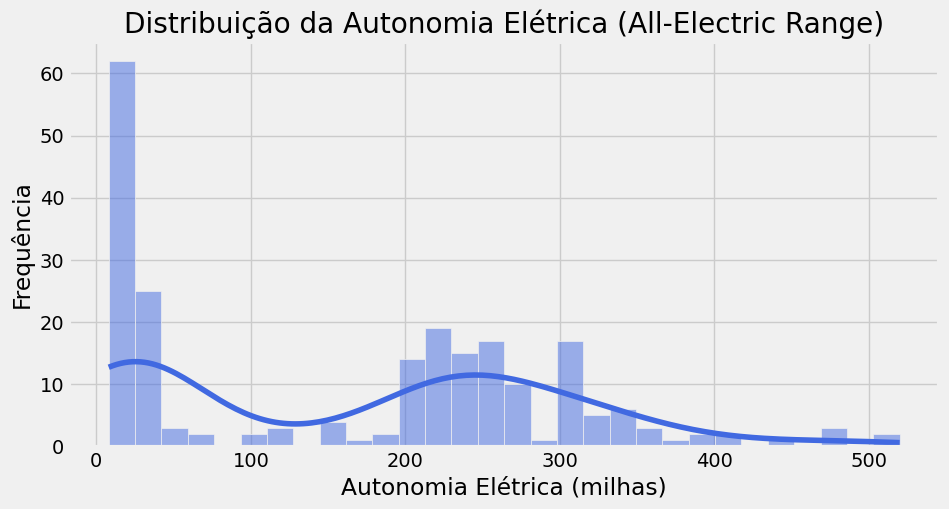

In [45]:
# Observando a vari√°vel alvo 'All-Electric Range'
plt.figure(figsize=(10, 5))
sns.histplot(df_cleaned['All-Electric Range'], kde=True, bins=30, color='royalblue')
plt.title('Distribui√ß√£o da Autonomia El√©trica (All-Electric Range)')
plt.xlabel('Autonomia El√©trica (milhas)')
plt.ylabel('Frequ√™ncia')
plt.grid(True)
plt.show()

**Acima vemos a distribui√ß√£o da autonomia el√©trica mostra uma forte concentra√ß√£o de ve√≠culos com autonomia inferior a 50 milhas, sugerindo que muitos modelos ainda operam como h√≠bridos plug-in (PHEVs) com alcance el√©trico limitado. Por outro lado, h√° uma segunda concentra√ß√£o entre 200 e 300 milhas, indicando a presen√ßa de modelos 100% el√©tricos mais avan√ßados.Tamb√©m temos modelos com mais de 400 milhas de autonomia, provavelmente s√£o modelos de topo. A dispers√£o acentuada revela a heterogeneidade tecnol√≥gica entre os ve√≠culos alternativos registrados.**

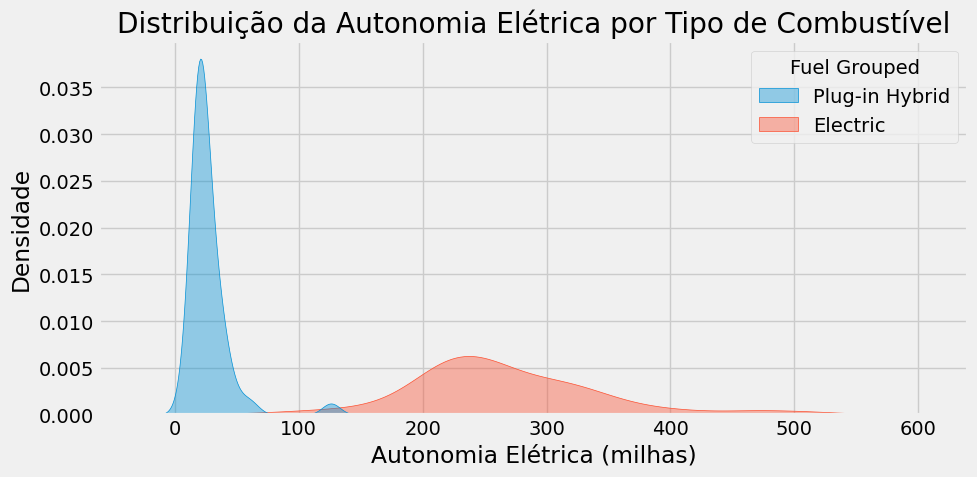

In [46]:
# Gr√°fico de densidade da autonomia separada por tipo de combust√≠vel
plt.figure(figsize=(10, 5))
sns.kdeplot(data=df_cleaned[df_cleaned['All-Electric Range'].notna()],
            x='All-Electric Range',
            hue='Fuel Grouped',
            fill=True,
            alpha=0.4,
            common_norm=False)

plt.title('Distribui√ß√£o da Autonomia El√©trica por Tipo de Combust√≠vel')
plt.xlabel('Autonomia El√©trica (milhas)')
plt.ylabel('Densidade')
plt.grid(True)
plt.tight_layout()
plt.show()

**Neste gr√°fico validamos o que vimos no anterior, onde os ve√≠culos Plug-in Hybrid s√£o os de menor autonomia e os 100% el√©tricos com uma autonomia muito maior.**

**Plug-in Hybrid** concentram-se fortemente em autonomias abaixo de 50 milhas, pois o motor el√©trico √© complementar ao motor a combust√£o.

**100% El√©tricos** apresentam uma distribui√ß√£o mais dispersa e centrada entre 200 e 300 milhas, com alguns modelos de topo chegando a ultrapassar 500 milhas.

**A separa√ß√£o entre os dois grupos √© n√≠tida, o que sugere que o tipo de combust√≠vel √© um forte determinante da autonomia el√©trica. Essa visualiza√ß√£o √© essencial para destacar como a tecnologia e o design de propuls√£o impactam diretamente no alcance el√©trico dos ve√≠culos**.



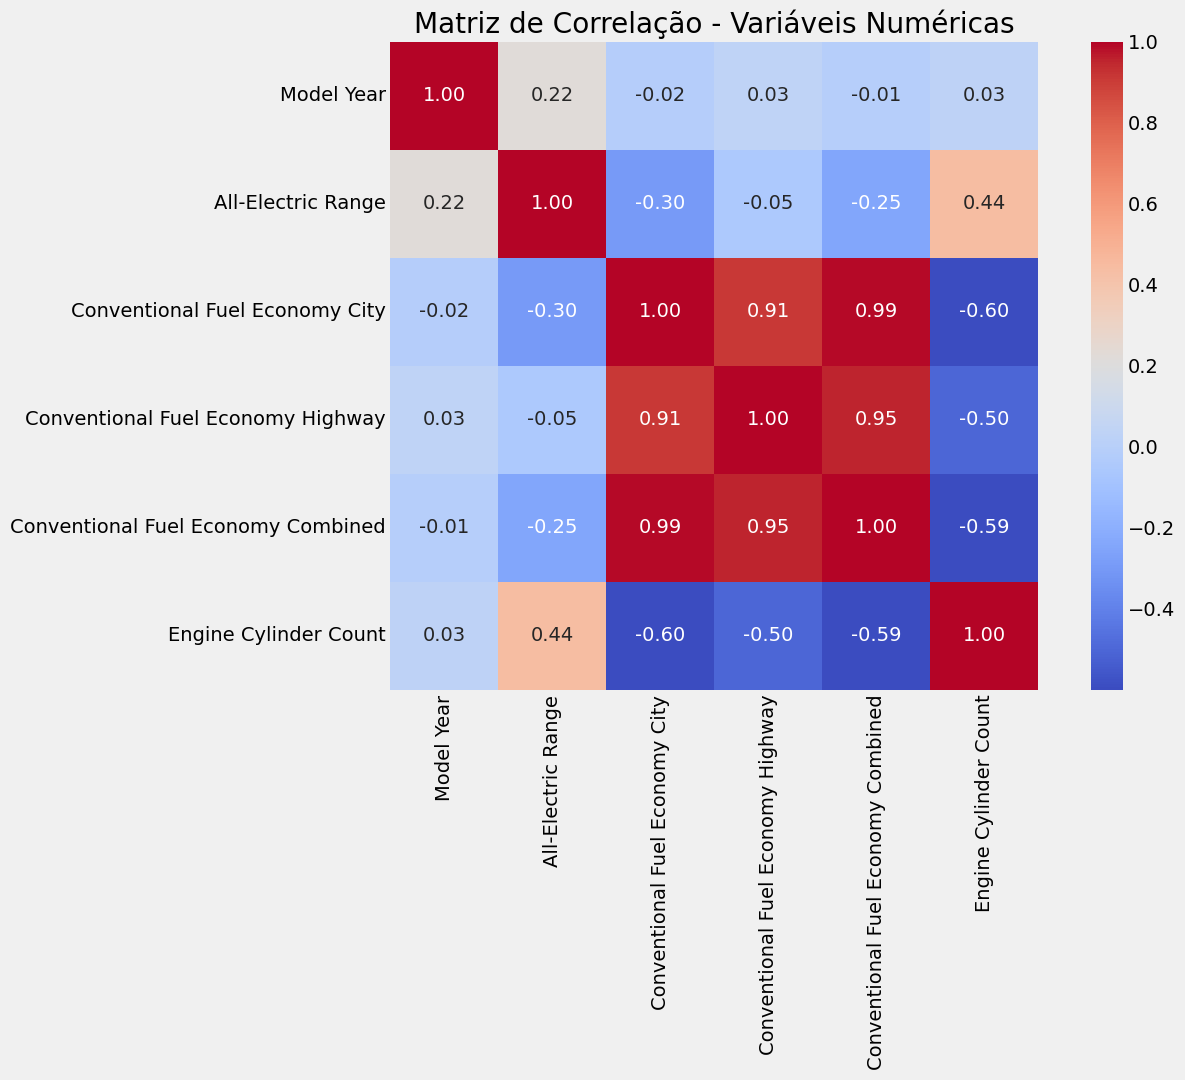

In [47]:
# Matriz de correla√ß√£o apenas para vari√°veis num√©ricas
plt.figure(figsize=(12, 8))
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Matriz de Correla√ß√£o - Vari√°veis Num√©ricas')
plt.show()

**Na matriz acima percebemos uma alta correla√ß√£o entre as vari√°veis 'Fuel Economy City', 'Fuel Economy Highway' e 'Fuel Economy Combined', 2 delas ser√£o exclu√≠das para n√£o atrapalhar o modelo com multicolinearidade, pois a mesma dificulta a obten√ß√£o de estimativas confi√°veis e interpret√°veis do impacto de cada vari√°vel preditora no modelo.**

In [48]:
# Excluindo as vari√°veis 'Conventional Fuel Economy City' e 'Conventional Fuel Economy Highway'
df_cleaned.drop(columns=['Conventional Fuel Economy City', 'Conventional Fuel Economy Highway'], inplace=True)

In [49]:
# Observando
df_cleaned.head()

Category  Model Year Manufacturer                     Fuel  \
14  Sedan/Wagon      2022.0         Audi  Plug-in Hybrid Electric   
16  Sedan/Wagon      2022.0         Audi                 Electric   
17          SUV      2022.0         Audi                 Electric   
18          SUV      2022.0         Audi                 Electric   
19          SUV      2022.0         Audi                 Electric   

    All-Electric Range  Conventional Fuel Economy Combined Engine Type  \
14                26.0                                27.0          SI   
16               238.0                                24.0     e-motor   
17               222.0                                24.0     e-motor   
18               208.0                                24.0     e-motor   
19               181.0                                24.0     e-motor   

                         Engine Size  Engine Cylinder Count Drivetrain  \
14                              2.0L                    4.0        AWD   
16             175 kW electric motor                    6.0        AWD   
17  141 kW and 172 kW electric motor                    6.0        AWD   
18              138kW electric motor                    6.0        AWD   
19              138kW electric motor                    6.0        AWD   

   Manufacturer Grouped    Fuel Grouped Engine Size Category  \
14                 Audi  Plug-in Hybrid        Hybrid System   
16                 Audi        Electric       Electric Motor   
17                 Audi        Electric       Electric Motor   
18                 Audi        Electric       Electric Motor   
19                 Audi        Electric       Electric Motor   

   Drivetrain Grouped  
14                AWD  
16                AWD  
17                AWD  
18                AWD  
19                AWD

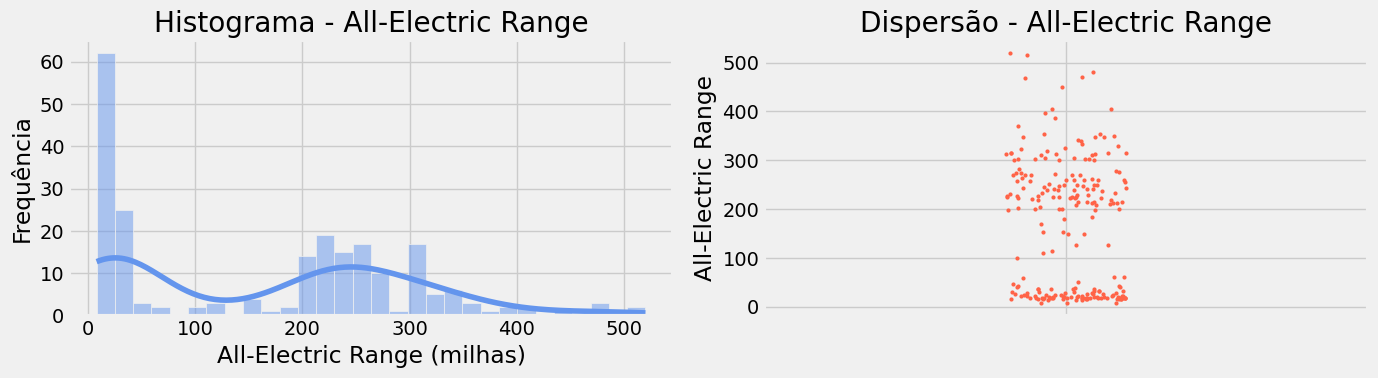

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df_cleaned['All-Electric Range'], ax=axes[0], bins=30, kde=True, color='cornflowerblue')
axes[0].set_title('Histograma - All-Electric Range')
axes[0].set_xlabel('All-Electric Range (milhas)')
axes[0].set_ylabel('Frequ√™ncia')
axes[0].grid(True)
sns.stripplot(y=df_cleaned['All-Electric Range'], ax=axes[1], color='tomato', size=3)
axes[1].set_title('Dispers√£o - All-Electric Range')
axes[1].set_ylabel('All-Electric Range')
axes[1].grid(True)
plt.tight_layout()
plt.show()

**A visualiza√ß√£o acima combina duas abordagens para entender melhor a vari√°vel `All-Electric Range`:**

**Histograma com KDE (√† esquerda):** Evidencia dois picos distintos, um entre 0 e 50 milhas (PHEVs) e outro entre 200 e 300 milhas (ve√≠culos el√©tricos puros). A curva suavizada (KDE) destaca a bimodalidade da distribui√ß√£o.

**Gr√°fico de dispers√£o (√† direita):** Refor√ßa a exist√™ncia de dois agrupamentos verticais bem definidos,, mostra que poucos ve√≠culos ultrapassam a marca de 400 milhas de autonomia. A disposi√ß√£o vertical permite observar facilmente a concentra√ß√£o de pontos nas faixas cr√≠ticas.

**Essas visualiza√ß√µes refor√ßam a heterogeneidade da frota e mostram como ainda h√° uma grande quantidade de ve√≠culos com baixa autonomia el√©trica no mercado.**


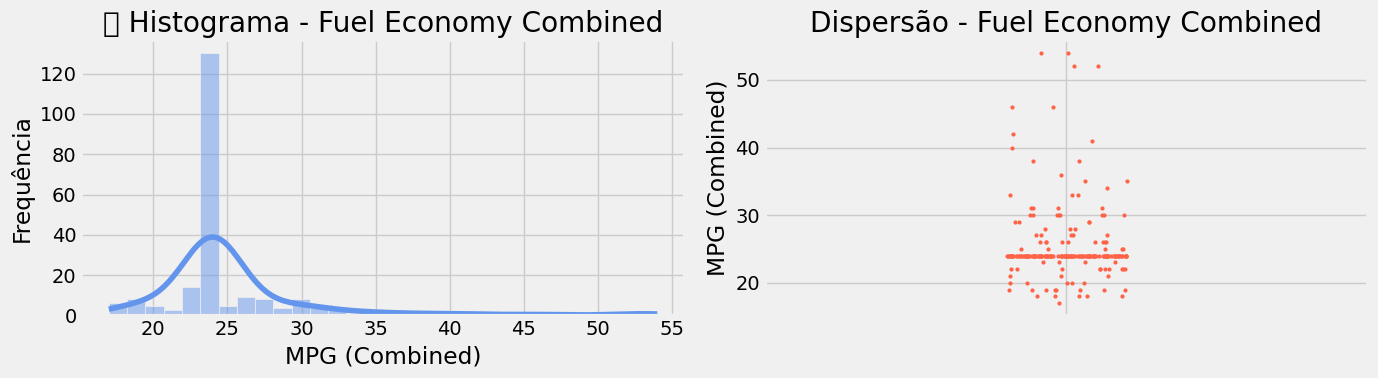

In [51]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df_cleaned['Conventional Fuel Economy Combined'], ax=axes[0], bins=30, kde=True, color='cornflowerblue')
axes[0].set_title('üìä Histograma - Fuel Economy Combined')
axes[0].set_xlabel('MPG (Combined)')
axes[0].set_ylabel('Frequ√™ncia')
axes[0].grid(True)
sns.stripplot(y=df_cleaned['Conventional Fuel Economy Combined'], ax=axes[1], color='tomato', size=3)
axes[1].set_title('Dispers√£o - Fuel Economy Combined')
axes[1].set_ylabel('MPG (Combined)')
axes[1].grid(True)
plt.tight_layout()
plt.show()

**A an√°lise acima da efici√™ncia de combust√≠vel convencional (MPG (milhas por gal√£o) combinado) mostra uma concentra√ß√£o not√°vel dos ve√≠culos entre 23 e 26 MPG, com poucos registros acima de 40 MPG.**

**Histograma com KDE (√† esquerda):** Mostra forte concentra√ß√£o ao redor de 24 MPG, indicando baixa variabilidade. O pico acentuado sugere que muitos ve√≠culos compartilham configura√ß√µes semelhantes de motoriza√ß√£o e efici√™ncia.

**Gr√°fico de dispers√£o (√† direita):** Mostra uma faixa bem estreita de efici√™ncia para a maioria dos ve√≠culos, com alguns poucos outliers acima de 50 MPG, que podem indicar ve√≠culos h√≠bridos leves ou mais eficientes.

**Esses dados refor√ßam que, apesar da evolu√ß√£o tecnol√≥gica, a efici√™ncia m√©dia dos ve√≠culos com combust√≠vel convencional ainda √© limitada, quando comparada √† autonomia el√©trica crescente de modelos EVs.**


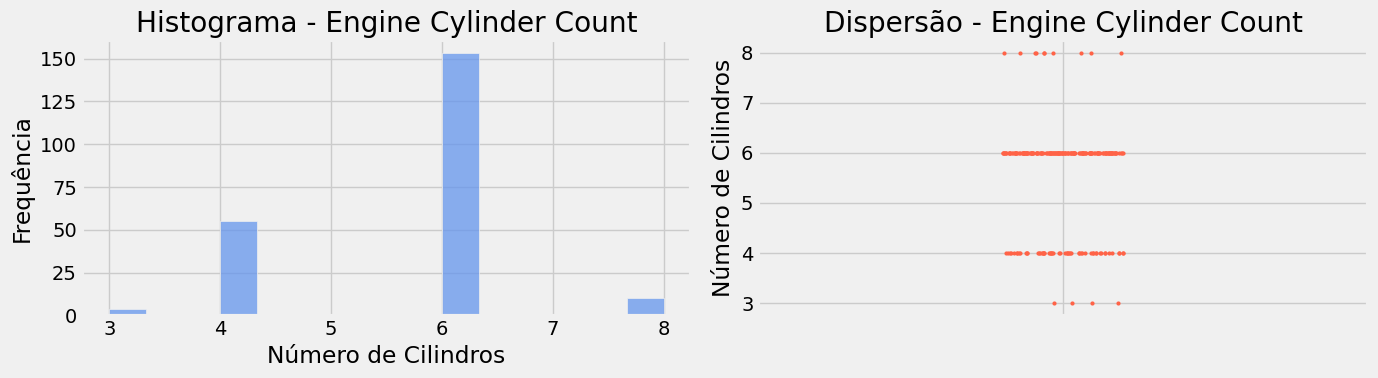

In [52]:
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.histplot(df_cleaned['Engine Cylinder Count'], ax=axes[0], bins=15, kde=False, color='cornflowerblue')
axes[0].set_title('Histograma - Engine Cylinder Count')
axes[0].set_xlabel('N√∫mero de Cilindros')
axes[0].set_ylabel('Frequ√™ncia')
axes[0].grid(True)
sns.stripplot(y=df_cleaned['Engine Cylinder Count'], ax=axes[1], color='tomato', size=3)
axes[1].set_title('Dispers√£o - Engine Cylinder Count')
axes[1].set_ylabel('N√∫mero de Cilindros')
axes[1].grid(True)
plt.tight_layout()
plt.show()

**A visualiza√ß√£o acima apresenta a frequ√™ncia e dispers√£o da quantidade de cilindros nos motores dos ve√≠culos registrados:**

**Histograma (√† esquerda):** A maioria dos ve√≠culos possui 6 cilindros, seguido por 4 cilindros. H√° alguns registros com 3 ou 8 cilindros, representando configura√ß√µes menos comuns.

**Gr√°fico de dispers√£o (√† direita):** Confirma a forte concentra√ß√£o nos valores 4 e 6, com poucos outliers em 3 e 8. Esses padr√µes s√£o consistentes com o uso de motores convencionais a combust√£o.

**Motores com menos cilindros (ex: 3 ou 4) tendem a ser mais eficientes e usados em ve√≠culos compactos ou h√≠bridos leves.**

**Motores com mais cilindros (ex: 6 ou 8) geralmente entregam mais pot√™ncia, mas consomem mais, o que impacta negativamente a autonomia e efici√™ncia.**




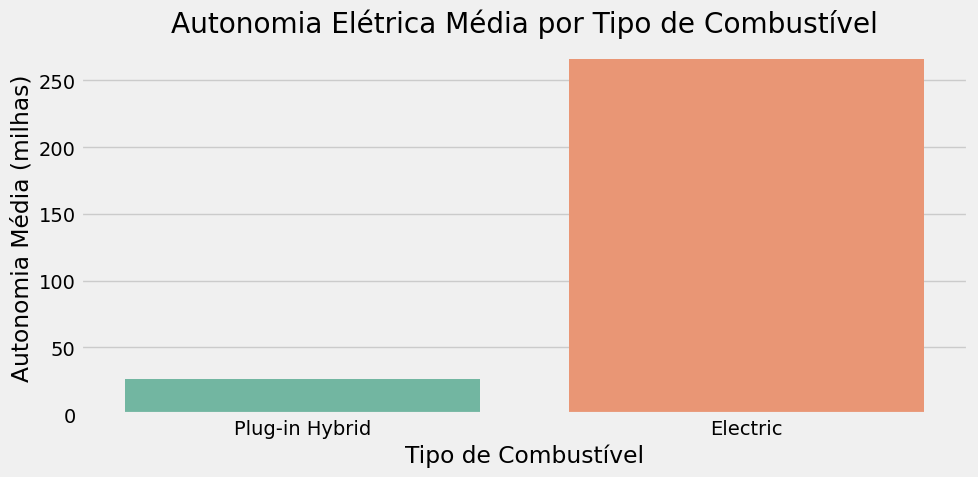

In [53]:
# M√©dia de autonomia por tipo de combust√≠vel
media_fuel = df_cleaned.groupby('Fuel Grouped')['All-Electric Range'].mean().sort_values()
plt.figure(figsize=(10, 5))
sns.barplot(x=media_fuel.index, y=media_fuel.values, palette='Set2')
plt.title('Autonomia El√©trica M√©dia por Tipo de Combust√≠vel')
plt.xlabel('Tipo de Combust√≠vel')
plt.ylabel('Autonomia M√©dia (milhas)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**O gr√°fico acima compara a autonomia el√©trica m√©dia dos ve√≠culos conforme o tipo de combust√≠vel utilizado:**

**Ve√≠culos 100% El√©tricos** possuem uma autonomia m√©dia significativamente superior, ultrapassando 260 milhas**.

**Ve√≠culos Plug-in Hybrid** apresentam m√©dia de cerca de 30 milhas, pois o motor el√©trico √© usado apenas em trechos curtos enquanto o restante do trajeto √© complementado pelo motor a combust√£o.

**A diferen√ßa dr√°stica evidencia o avan√ßo das tecnologias de bateria e a proposta distinta de cada categoria:**
  - **Plug-in Hybrids**: foco em economia e flexibilidade.
  - **El√©tricos puros**: foco em emiss√µes zero e maior autonomia.

**Esse comparativo deixa claro por que os EVs est√£o ganhando protagonismo no mercado automotivo global.**

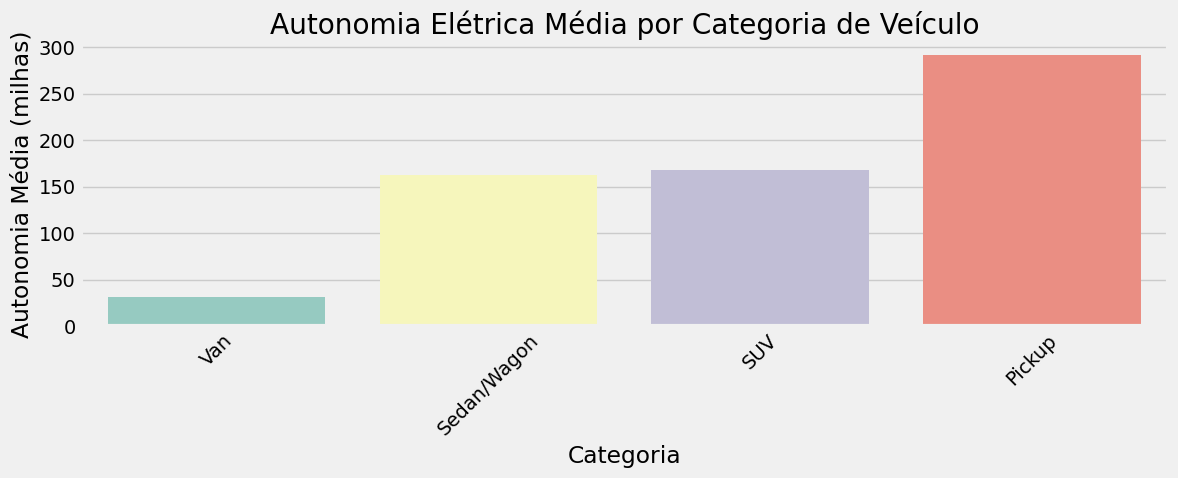

In [54]:
# M√©dia de autonomia por categoria de ve√≠culo
media_cat = df_cleaned.groupby('Category')['All-Electric Range'].mean().sort_values()
plt.figure(figsize=(12, 5))
sns.barplot(x=media_cat.index, y=media_cat.values, palette='Set3')
plt.title('Autonomia El√©trica M√©dia por Categoria de Ve√≠culo')
plt.xlabel('Categoria')
plt.ylabel('Autonomia M√©dia (milhas)')
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**Acima vemos a m√©dia da autonomia el√©trica varia significativamente entre as categorias de ve√≠culos:**

**Vans** apresentam a menor autonomia, com m√©dia inferior a 40 milhas. Isso se deve, em parte, ao uso predominante de vers√µes h√≠bridas plug-in com baterias menores.

**Sedans/Wagons** e **SUVs** possuem m√©dias semelhantes, em torno de 160 a 170 milhas, refletindo um equil√≠brio entre peso, aerodin√¢mica e capacidade da bateria.

**Pickups** surpreendem com a maior m√©dia de autonomia, ultrapassando 290 milhas. Isso pode ser atribu√≠do a: Uso de baterias maiores para atender √† alta demanda energ√©tica desses ve√≠culos e  a estrat√©gia de mercado para compensar seu maior consumo e manter competitividade com ve√≠culos convencionais.

**Em vista disto percebemos que o tipo de ve√≠culo impacta diretamente na escolha do sistema de propuls√£o el√©trica e no tamanho da bateria, afetando a autonomia total.**


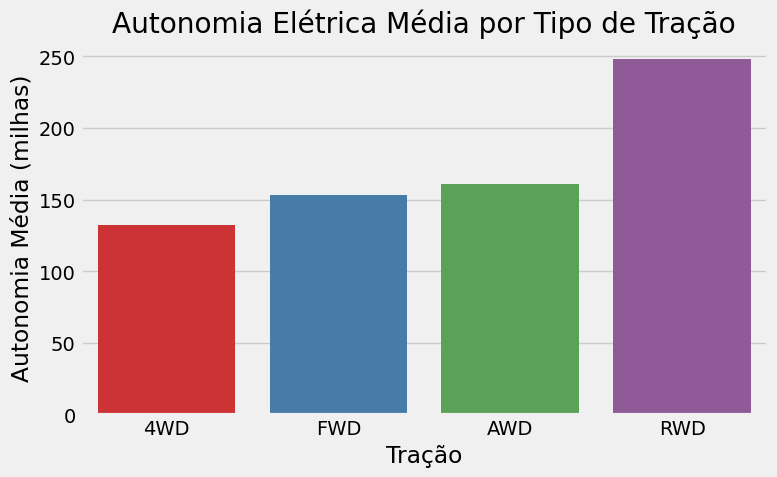

In [55]:
# M√©dia de autonomia por tipo de tra√ß√£o
media_tracao = df_cleaned.groupby('Drivetrain Grouped')['All-Electric Range'].mean().sort_values()
plt.figure(figsize=(8, 5))
sns.barplot(x=media_tracao.index, y=media_tracao.values, palette='Set1')
plt.title('Autonomia El√©trica M√©dia por Tipo de Tra√ß√£o')
plt.xlabel('Tra√ß√£o')
plt.ylabel('Autonomia M√©dia (milhas)')
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

**Analisando o gr√°fico acima temos:**

**RWD (tra√ß√£o traseira):**  Tem a maior autonomia m√©dia, √© o tipo de tra√ß√£o preferencial em el√©tricos modernos, pois √© mais eficiente em linha reta e exige menos tra√ß√£o.

**AWD (tra√ß√£o integral permanente) e 4WD (tra√ß√£o 4x4 com ativa√ß√£o manual):** Tem autonomia parecida, pois ve√≠culos com tra√ß√£o integral tendem a ser mais pesados o que impacta no consumo.

**FWD (tra√ß√£o dianteira):** Tem a menor autonomia, podem refletir modelos mais antigos ou compactos com bateria menor.